In [1]:
from google.colab import files
uploaded=files.upload()

Saving Sentiment Analysis(reviews).csv to Sentiment Analysis(reviews).csv


In [2]:
import pandas as pd
df=pd.read_csv("Sentiment Analysis(reviews).csv")
df

,headline,reviewBody,ratingValue
0,Super light and efficient laptop,Super light and efficient laptop. Crisp & cle...,5
1,NEW laptop is great,so far I am loving the new look and the feel o...,5
2,Lightweight powerhouse.,Great build quality \ excellent screen \ very ...,5
3,Great Laptop for Work,Excellent laptop for work. Processor was able ...,5
4,Practical Solid Laptop,"So far so good, I like it has an HDMI, USB-C &...",5
...,...,...,...
300,Faulty motherboard,Dell sent me a laptop with a faulty motherboard,1
301,Dead on arrival,"Laptop dead on arrival, still waiting on a rep...",1
302,Bad Quality,"Bad Quality, overheating, and keyboard/trackpa...",1
303,Hassles with installation of Win 11,Laptop did not come with the required security...,1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [4]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Drop rows with missing values, if any
df.dropna(subset=['reviewBody'], inplace=True)

In [6]:
# EDA

# Basic statistics for numerical data
print(df.describe())

       ratingValue
count   305.000000
mean      4.350820
std       1.102423
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


In [7]:
# EDA

# Join all headlines
text = ' '.join(df['reviewBody'].astype(str).tolist())

<ipython-input-8-35f36eaa48de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ratingValue', data=df, palette="viridis")


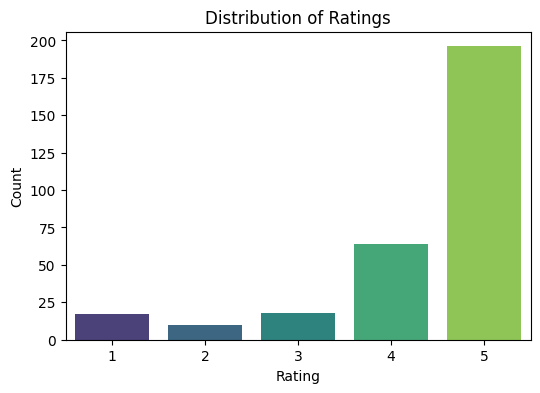

In [8]:
# Distribution of ratings with customized colors
plt.figure(figsize=(6, 4))
sns.countplot(x='ratingValue', data=df, palette="viridis")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

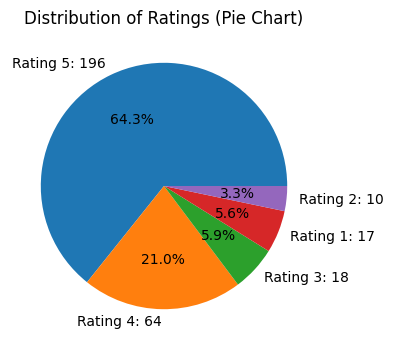

In [9]:
# prompt: prompt: do eda for scaling on 5 using pie chart and show how many members for each ratings and give the code as well

# Pie chart for the number of members for each rating
plt.figure(figsize=(6, 4))
rating_counts = df['ratingValue'].value_counts()
labels = [f'Rating {rating}: {count}' for rating, count in rating_counts.items()]
plt.pie(rating_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Ratings (Pie Chart)')
plt.show()


In [10]:
# Frequency Counts
print("Frequency Counts:")
print(df['ratingValue'].value_counts())

Frequency Counts:
ratingValue
5    196
4     64
3     18
1     17
2     10
Name: count, dtype: int64


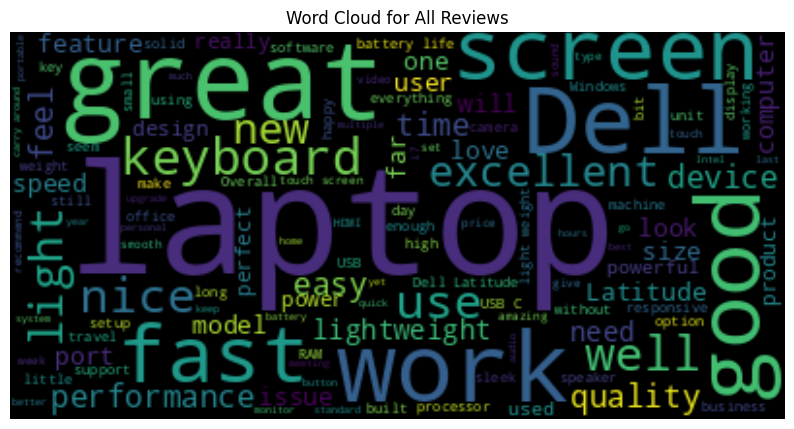

In [11]:
# WordCloud for all reviews
wordcloud = WordCloud(background_color='black').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Reviews')
plt.show()

In [12]:
# Function to calculate sentiment
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity


In [13]:
# Apply function to review bodies
df['sentiment'] = df['reviewBody'].apply(get_sentiment)

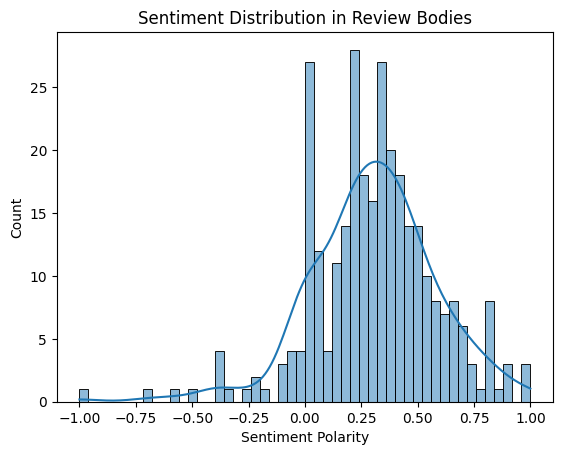

In [14]:
# Sentiment Analysis
sns.histplot(df['sentiment'], bins=50, kde=True)
plt.title('Sentiment Distribution in Review Bodies')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

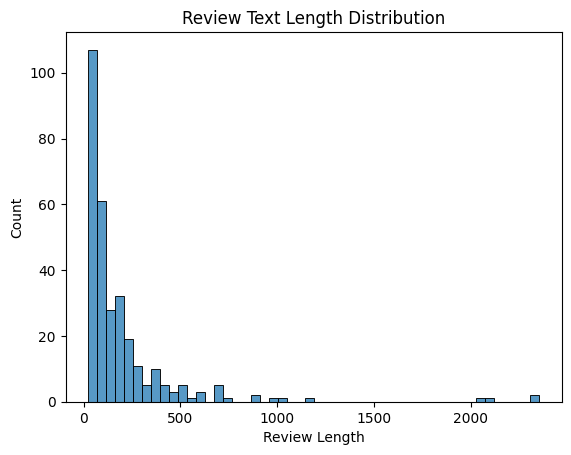

In [15]:
# Text Length Analysis
df['review_length'] = df['reviewBody'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Review Text Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

<ipython-input-16-27f03f9bad02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ratingValue', y='sentiment', data=df, palette=custom_palette)


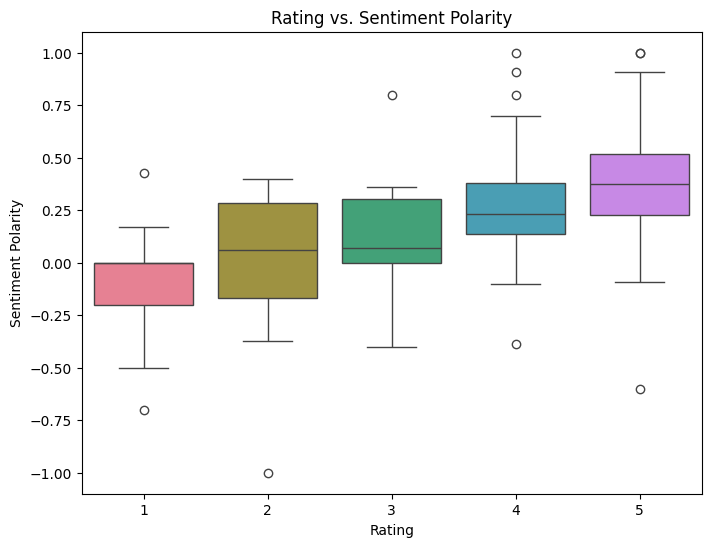

In [16]:
# Define a custom color palette
custom_palette = sns.color_palette("husl", len(df['ratingValue'].unique()))

# Bivariate Analysis: Rating vs. Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='ratingValue', y='sentiment', data=df, palette=custom_palette)
plt.title('Rating vs. Sentiment Polarity')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()


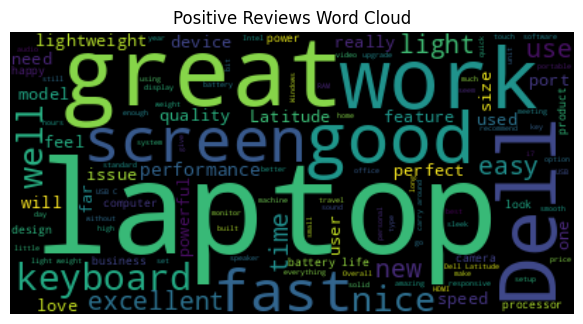

In [17]:
# Word Frequency by Sentiment
positive_reviews = ' '.join(df[df['sentiment'] > 0]['reviewBody'].astype(str).tolist())
negative_reviews = ' '.join(df[df['sentiment'] < 0]['reviewBody'].astype(str).tolist())

wordcloud_pos = WordCloud(background_color='black').generate(positive_reviews)
wordcloud_neg = WordCloud(background_color='black').generate(negative_reviews)

plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()


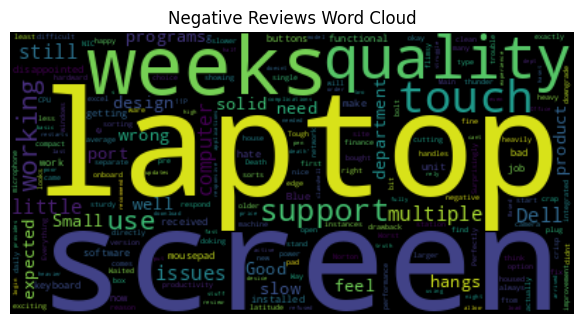

In [18]:
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()


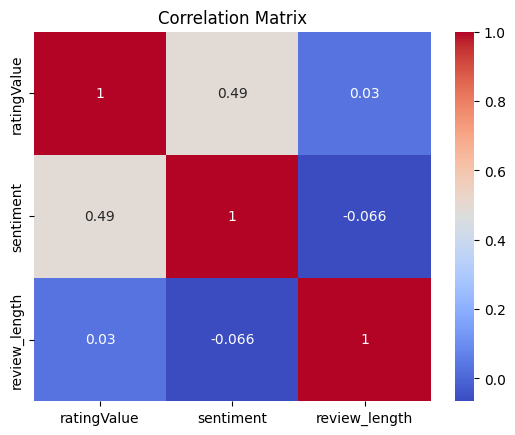

In [19]:
# Correlation Matrix
sns.heatmap(df[['ratingValue', 'sentiment', 'review_length']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

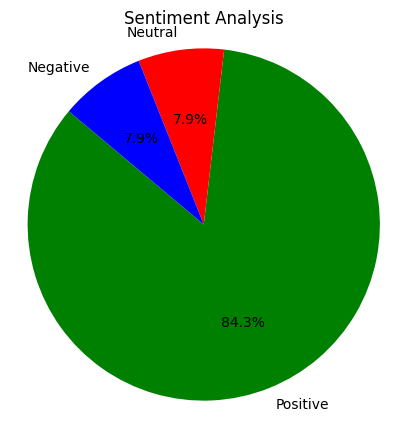

In [20]:
# Drop rows with missing values, if any
df.dropna(subset=['reviewBody'], inplace=True)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to each review text
df['sentiment'] = df['reviewBody'].apply(analyze_sentiment)

# Pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Sentiment Analysis')
plt.axis('equal')
plt.show()

In [21]:
# Drop rows with missing values, if any
df.dropna(subset=['reviewBody'], inplace=True)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to each review text
df['sentiment'] = df['reviewBody'].apply(analyze_sentiment)

# Displaying the sentiment analysis results
print(df[['reviewBody', 'sentiment']])

                                            reviewBody sentiment
0    Super light and efficient laptop.  Crisp & cle...  Positive
1    so far I am loving the new look and the feel o...  Positive
2    Great build quality \ excellent screen \ very ...  Positive
3    Excellent laptop for work. Processor was able ...  Positive
4    So far so good, I like it has an HDMI, USB-C &...  Positive
..                                                 ...       ...
300    Dell sent me a laptop with a faulty motherboard   Neutral
301  Laptop dead on arrival, still waiting on a rep...  Negative
302  Bad Quality, overheating, and keyboard/trackpa...  Negative
303  Laptop did not come with the required security...   Neutral
304  Laptop is broken and Customer Support is not h...  Negative

[305 rows x 2 columns]


In [22]:
# Apply sentiment analysis function to each review text
df['sentiment'] = df['reviewBody'].apply(analyze_sentiment)

In [23]:
# Tokenization, Stop words removal, Stemming, and Lemmatization
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [24]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalnum()]
    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmatized_tokens)

In [25]:
# Apply text preprocessing
df['clean_text'] = df['reviewBody'].apply(preprocess_text)


In [26]:
# Split the dataset into features (X) and target variable (Y)
X = df['reviewBody']  # Assuming 'reviewBody' is the column containing the review text
Y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [27]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train machine learning models
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, Y_train)

Y_pred_train = nb_classifier.predict(X_train_vectorized)
Y_pred_test = nb_classifier.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"==================== nb_classifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", test_accuracy.round(2))

==================== nb_classifier ====================
Training Accuracy: 0.83
Test Accuracy: 0.87


In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vectorized, Y_train)

Y_pred_train = log_reg.predict(X_train_vectorized)
Y_pred_test = log_reg.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"==================== Logistic Regression ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", test_accuracy.round(2))


==================== Logistic Regression ====================
Training Accuracy: 0.83
Test Accuracy: 0.87


In [30]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, Y_train)


Y_pred_train = log_reg.predict(X_train_vectorized)
Y_pred_test = log_reg.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"==================== svm_classifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", test_accuracy.round(2))


==================== svm_classifier ====================
Training Accuracy: 0.83
Test Accuracy: 0.87


In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(X_train_vectorized,Y_train)

Y_pred_train = KNN.predict(X_train_vectorized)
Y_pred_test  = KNN.predict(X_test_vectorized)

# step6:  metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ac_train = accuracy_score(Y_train,Y_pred_train)
ac_test = accuracy_score(Y_test,Y_pred_test)
print(f"==================== KNeighborsClassifier ====================")
print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))


==================== KNeighborsClassifier ====================
Training Accuracy: 0.85
Test Accuracy: 0.87


In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')

DT.fit(X_train_vectorized, Y_train)
Y_pred_train = DT.predict(X_train_vectorized)
Y_pred_test = DT.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"==================== Decision Tree ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", test_accuracy.round(2))


==================== Decision Tree ====================
Training Accuracy: 1.0
Test Accuracy: 0.85


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_vectorized, Y_train)

Y_pred_train = rf_classifier.predict(X_train_vectorized)
Y_pred_test = rf_classifier.predict(X_test_vectorized)

train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print(f"==================== RandomForestClassifier ====================")
print("Training Accuracy:", train_accuracy.round(2))
print("Test Accuracy:", test_accuracy.round(2))


==================== RandomForestClassifier ====================
Training Accuracy: 1.0
Test Accuracy: 0.87


In [34]:
# Evaluate models and store results in a dictionary
results = {}
classifiers = {
    "Naive Bayes": nb_classifier,
    "Logistic Regression": log_reg,
    "Support Vector Machine": svm_classifier,
    "KNeighborsClassifier": KNN,
    "DecisionTreeClassifier": DT,
    "Random Forest": rf_classifier
}
for name, classifier in classifiers.items():
    Y_pred_train = classifier.predict(X_train_vectorized)
    Y_pred_test = classifier.predict(X_test_vectorized)

    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    results[name] = {
        "Training Accuracy": train_accuracy.round(2),
        "Testing Accuracy": test_accuracy.round(2),
    }
# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Display the results table
print(results_df)

                        Training Accuracy  Testing Accuracy
Naive Bayes                          0.83              0.87
Logistic Regression                  0.83              0.87
Support Vector Machine               0.94              0.87
KNeighborsClassifier                 0.85              0.87
DecisionTreeClassifier               1.00              0.85
Random Forest                        1.00              0.87


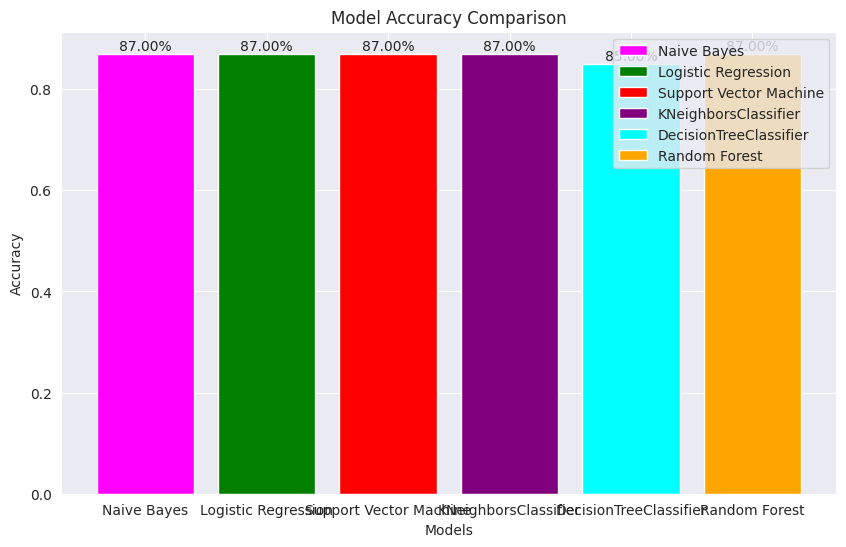

In [63]:
# prompt: give me the code to visualize the accuracy of all models use different color to look good and show the autopct

import matplotlib.pyplot as plt

# Define colors for each model
colors = {
    "Naive Bayes":  "magenta",
    "Logistic Regression": "green",
    "Support Vector Machine": "red",
    "KNeighborsClassifier": "purple",
    "DecisionTreeClassifier": "cyan",
    "Random Forest": "orange"
}

# Create a bar chart
plt.figure(figsize=(10, 6))
for model_name, result in results_df.iterrows():
    plt.bar(model_name, result["Testing Accuracy"], color=colors[model_name], label=model_name)

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add data labels
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   f'{results_df["Testing Accuracy"].iloc[i] * 100:.2f}%', ha='center', va='bottom')

# Add legend and show plot
plt.legend()
plt.show()


In [35]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained Random Forest model
@st.cache
def load_model():
    model = rf_classifier()  # Initialize your Random Forest model here
    # Load the trained model weights (if applicable)
    return model

# Function to make predictions
def predict(model, input_data):
    prediction = model.predict(input_data)
    return prediction

# Main function
def main():
    # Load the trained model
    model = load_model()

    # Title of the app
    st.title('Random Forest Model Deployment')

    # Create input fields for user input
    feature = st.text_input ()

    # Create a button to trigger predictions
    if st.button('Predict'):
        # Prepare input data for prediction
        input_data = [[feature]]  # Create input data in the correct format
        # Make prediction using the loaded model
        prediction = predict(model, input_data)
        # Display the prediction result
        st.write(f'Prediction: {prediction}')

# Run the main function
if __name__ == "__main__":
    main()
